# Compute performance metrics for the given Y and Y_score without sklearn

In [1]:
import pprint

import numpy as np
import pandas as pd
# other than these two you should not import any other packages

<pre>
<font color='red'><b>A.</b></font> Compute performance metrics for the given data <strong>5_a.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points >> number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_a.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a> Note: it should be numpy.trapz(tpr_array, fpr_array) not numpy.trapz(fpr_array, tpr_array)</li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [2]:
# write your code here
data = pd.read_csv("data/5_a.csv")
data["y_pred"] = data["proba"].map(lambda x: 0 if x < 0.5 else 1)
data.head()

,y,proba,y_pred
0,1.0,0.637387,1
1,1.0,0.635165,1
2,1.0,0.766586,1
3,1.0,0.724564,1
4,1.0,0.889199,1


In [3]:
def compute_confusion_matrix(y_true, y_pred):
    matrix = [[0, 0] for _ in range(2)]
    for i, j in zip(y_true, y_pred):
        matrix[int(i)][int(j)] += 1
    return matrix


In [4]:
confusion_mat = compute_confusion_matrix(data["y"], data["y_pred"])
pprint.pprint(confusion_mat)

[[0, 100], [0, 10000]]


In [5]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(data["y"], data["y_pred"]))

[[    0   100]
 [    0 10000]]


In [6]:
#Precision and Recall
def precision_score_(y_true, y_pred):
    matrix = compute_confusion_matrix(y_true, y_pred)
    return matrix[1][1] / (matrix[0][1] + matrix[1][1])


print(f"computed precision  : {precision_score_(data['y'], data['y_pred'])}")

from sklearn.metrics import precision_score

print(f'sklearn precision   : {precision_score(data["y"], data["y_pred"])} ')

computed precision  : 0.9900990099009901
sklearn precision   : 0.9900990099009901 


In [7]:
def recall_score_(y_true, y_pred):
    matrix = compute_confusion_matrix(y_true, y_pred)
    return matrix[1][1] / (matrix[1][0] + matrix[1][1])


print(f"computed recall  : {recall_score_(data['y'], data['y_pred'])}")

from sklearn.metrics import recall_score

print(f'sklearn recall   : {recall_score(data["y"], data["y_pred"])} ')

computed recall  : 1.0
sklearn recall   : 1.0 


In [8]:
def f1_score_(y_true, y_pred):
    prec = precision_score_(y_true, y_pred)
    recall = recall_score_(y_true, y_pred)
    return 2 * prec * recall / (prec + recall)


print(f"computed f1_score  : {f1_score_(data['y'], data['y_pred'])}")

from sklearn.metrics import f1_score

print(f'sklearn f1_score   : {f1_score(data["y"], data["y_pred"])} ')

computed f1_score  : 0.9950248756218906
sklearn f1_score   : 0.9950248756218906 


In [9]:
#accurcay
def accuracy_score_(y_true, y_pred):
    return sum((y_true[i] == y_pred[i]
                for i in range(len(y_true)))) / len(y_true)


print(f"computed accuracy  : {accuracy_score_(data['y'], data['y_pred'])}")

from sklearn.metrics import accuracy_score

print(f'sklearn accuracy   : {accuracy_score(data["y"], data["y_pred"])} ')

computed accuracy  : 0.9900990099009901
sklearn accuracy   : 0.9900990099009901 


In [10]:
def roc_auc_score_(y_true, y_score):
    total_len = len(y_true)
    y_true_sorted = [x for x, _ in sorted(zip(y_true, y_score), key=lambda tup: tup[1],reverse=True)]
    store = []

    total_positive = y_true_sorted.count(1)
    total_negative = total_len - total_positive

    tpr_ = []
    fpr_ = []
    cur_tp = 0
    cur_fp = 0
    for i in range(total_len):
        if y_true_sorted[i] == 1:
            cur_tp += 1
        else:
            cur_fp += 1
        tpr_.append(cur_tp/total_positive)
        fpr_.append(cur_fp/total_negative)

    return np.trapz(tpr_,fpr_) ,tpr_ ,fpr_

roc,tpr,fpr = roc_auc_score_(data['y'], data['proba'])

print(f"computed auc  : {roc}")

from sklearn.metrics import roc_auc_score

print(f'sklearn auc   : {roc_auc_score(data["y"], data["proba"])} ')

computed auc  : 0.48829900000000004
sklearn auc   : 0.48829900000000004 


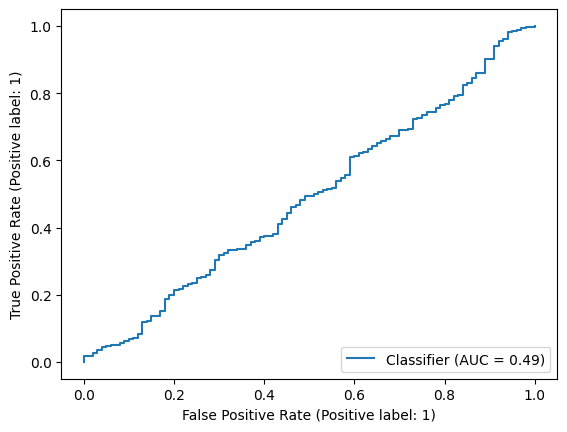

In [11]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(data["y"],data["proba"])

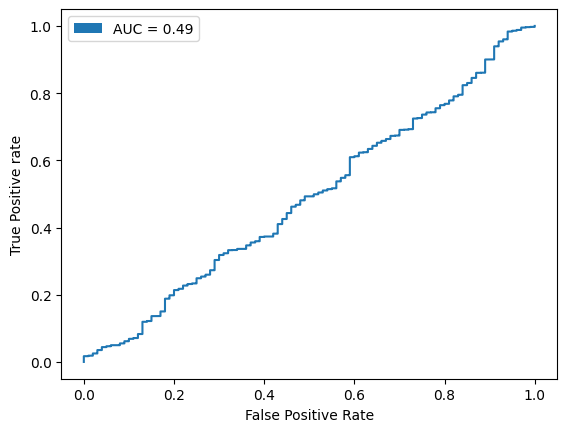

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
red_patch = mpatches.Patch(label=f'AUC = {roc:.2f}')
plt.legend(handles=[red_patch])
plt.show()

<pre>
<font color='red'><b>B.</b></font> Compute performance metrics for the given data <strong>5_b.csv</strong>
   <b>Note 1:</b> in this data you can see number of positive points << number of negatives points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_b.csv</b>
   <b>Note 3:</b> you need to derive the class labels from given score</pre> $y^{pred}= \text{[0 if y_score < 0.5 else 1]}$

<pre>
<ol>
<li> Compute Confusion Matrix </li>
<li> Compute F1 Score </li>
<li> Compute AUC Score, you need to compute different thresholds and for each threshold compute tpr,fpr and then use               numpy.trapz(tpr_array, fpr_array) <a href='https://stackoverflow.com/q/53603376/4084039'>https://stackoverflow.com/q/53603376/4084039</a>, <a href='https://stackoverflow.com/a/39678975/4084039'>https://stackoverflow.com/a/39678975/4084039</a></li>
<li> Compute Accuracy Score </li>
</ol>
</pre>

In [13]:
data = pd.read_csv("data/5_b.csv")
data["y_pred"] = data["proba"].map(lambda x: 0 if x < 0.5 else 1)
data.head()

,y,proba,y_pred
0,0.0,0.281035,0
1,0.0,0.465152,0
2,0.0,0.352793,0
3,0.0,0.157818,0
4,0.0,0.276648,0


In [14]:
confusion_mat = compute_confusion_matrix(data["y"], data["y_pred"])
pprint.pprint(confusion_mat)

[[9761, 239], [45, 55]]


In [15]:
print(confusion_matrix(data["y"], data["y_pred"]))

[[9761  239]
 [  45   55]]


In [16]:
print(f"computed precision  : {precision_score_(data['y'], data['y_pred'])}")
print(f'sklearn precision   : {precision_score(data["y"], data["y_pred"])} ')

computed precision  : 0.1870748299319728
sklearn precision   : 0.1870748299319728 


In [17]:
print(f"computed recall  : {recall_score_(data['y'], data['y_pred'])}")
print(f'sklearn recall   : {recall_score(data["y"], data["y_pred"])} ')

computed recall  : 0.55
sklearn recall   : 0.55 


In [18]:
print(f"computed f1_score  : {f1_score_(data['y'], data['y_pred'])}")
print(f'sklearn f1_score   : {f1_score(data["y"], data["y_pred"])} ')

computed f1_score  : 0.2791878172588833
sklearn f1_score   : 0.2791878172588833 


In [19]:
print(f"computed accuracy  : {accuracy_score_(data['y'], data['y_pred'])}")
print(f'sklearn accuracy   : {accuracy_score(data["y"], data["y_pred"])} ')

computed accuracy  : 0.9718811881188119
sklearn accuracy   : 0.9718811881188119 


computed auc  : 0.9377570000000001
sklearn auc   : 0.9377570000000001 


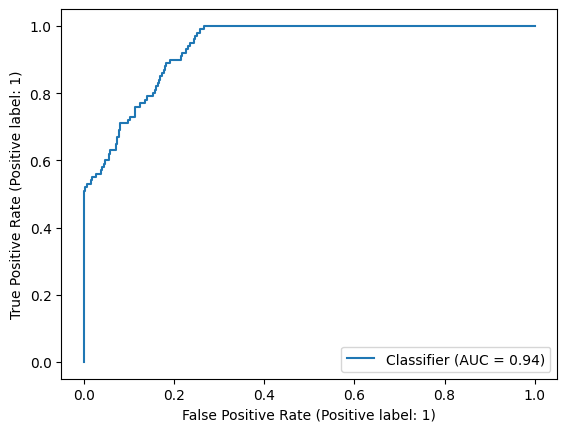

In [20]:

roc,tpr,fpr = roc_auc_score_(data['y'], data['proba'])

print(f"computed auc  : {roc}")
print(f'sklearn auc   : {roc_auc_score(data["y"], data["proba"])} ')

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(data["y"],data["proba"])

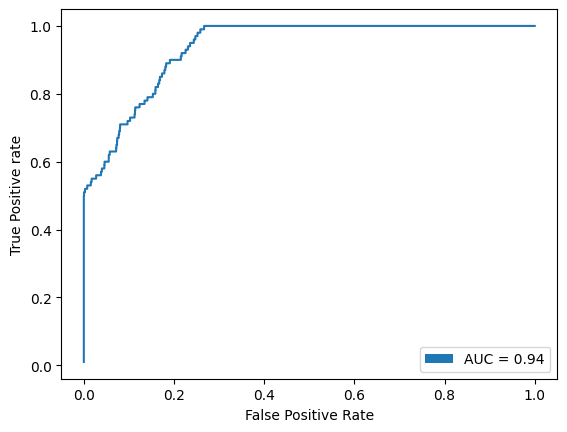

In [21]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
red_patch = mpatches.Patch(label=f'AUC = {roc:.2f}')
plt.legend(handles=[red_patch])
plt.show()

<font color='red'><b>C.</b></font> Compute the best threshold (similarly to ROC curve computation) of probability which gives lowest values of metric <b>A</b> for the given data <strong>5_c.csv</strong>
<br>

you will be predicting label of a data points like this: $y^{pred}= \text{[0 if y_score < threshold  else 1]}$

$ A = 500 \times \text{number of false negative} + 100 \times \text{numebr of false positive}$

<pre>
   <b>Note 1:</b> in this data you can see number of negative points > number of positive points
   <b>Note 2:</b> use pandas or numpy to read the data from <b>5_c.csv</b>
</pre>

In [22]:
data = pd.read_csv("data/5_c.csv")
print(data.head())
data.head()


   y      prob
0  0  0.458521
1  0  0.505037
2  0  0.418652
3  0  0.412057
4  0  0.375579


,y,prob
0,0,0.458521
1,0,0.505037
2,0,0.418652
3,0,0.412057
4,0,0.375579


In [23]:
def min_metric(y_true, y_score):
    total_len = len(y_true)
    y_true_sorted = [x for x, _ in sorted(zip(y_true, y_score), key=lambda tup: tup[1],reverse=True)]
    store = []

    total_positive = y_true_sorted.count(1)
    total_negative = total_len - total_positive

    cur_tp = 0
    cur_fp = 0
    min_value = float("inf")
    min_index = 0
    for i in range(total_len):
        if y_true_sorted[i] == 1:
            cur_tp += 1
        else:
            cur_fp += 1
        val = (500*(total_positive - cur_tp)) + (100 * cur_fp)
        if val < min_value:
            min_value = val
            min_index = i


    return sorted(y_score,reverse=True)[min_index],min_value

In [24]:
min_metric(data["y"],data["prob"])

(0.2300390278970873, 141000)

computed auc  : 0.8288141557331725
sklearn auc   : 0.8288141557331724 


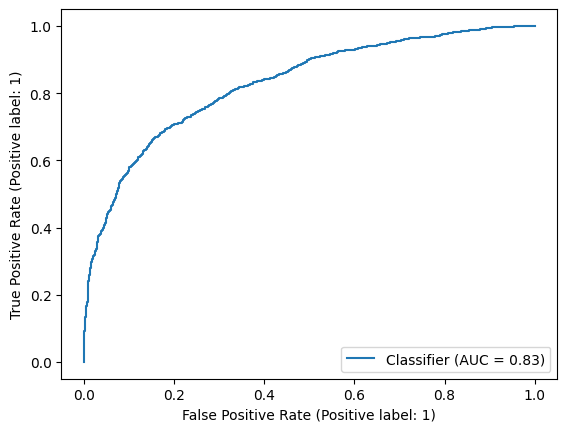

In [25]:
roc,tpr,fpr = roc_auc_score_(data['y'], data['prob'])

print(f"computed auc  : {roc}")
print(f'sklearn auc   : {roc_auc_score(data["y"], data["prob"])} ')

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(data["y"],data["prob"])

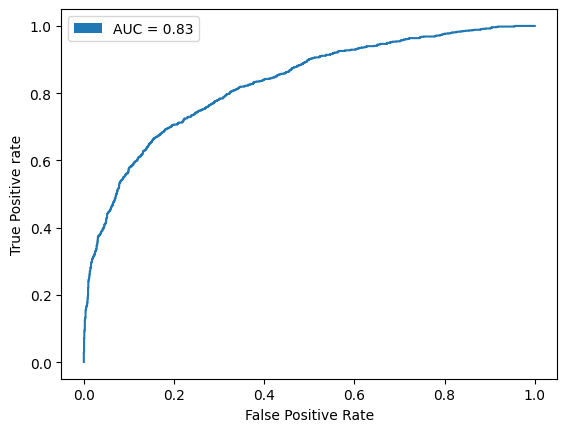

In [26]:
plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")
red_patch = mpatches.Patch(label=f'AUC = {roc:.2f}')
plt.legend(handles=[red_patch])
plt.show()